In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy
from collections import defaultdict
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider

import importlib
from simulator.ideal import SimulatorIdeal
from simulator.lennard import SimulatorLennard
from simulator.magnetic import SimulatorMagnetic
from simulator.models import Client, Simulation
from tqdm.notebook import tqdm
from utils.utils import beep
from utils.logs import get_logger

import multiprocessing
from multiprocessing import Pool, cpu_count

In [2]:
pool = Pool(cpu_count()); pool

<multiprocessing.pool.Pool state=RUN pool_size=32>

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4875.27it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 29314/30000 [00:06<00:00, 4894.55it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4665.40it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4416.77it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5114.68it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5024.80it/s]

100%|███████████████████████████████████████████████████████████████████████████████████

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5141.08it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5078.74it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4969.61it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4639.61it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4959.83it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4711.38it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5143.63it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4717.72it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4780.86it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4741.07it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4663.43it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4936.36it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4601.79it/s]


 16%|████████████████▋                                                                                         | 4717/30000 [00:01<00:05, 4716.29it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4650.35it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4794.54it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4932.10it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5198.16it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4810.11it/s]


  0%|                                                                                                                       | 0/30000 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4546.40it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5033.78it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5130.66it/s]



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4381.73it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4584.48it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4859.14it/s]


 66%|█████████████████████████████████████████████████████████████████████▏                                   | 19765/30000 [00:04<00:02, 4789.63it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5200.26it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4808.77it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4828.77it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4621.33it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4548.75it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4748.03it/s]


 55%|█████████████████████████████████████████████████████████▍                                               | 16423/30000 [00:03<00:02, 5361.58it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5029.80it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5007.61it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4703.05it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4813.13it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4791.29it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4764.75it/s]

 34%|███████████████████████████████████▋                                                                     | 10181/30000 [00:02<00:03, 5152.78it/s]

 34%|███████████████████████████████████▏                                                                     | 10061/30000 [00:02<00:04, 4745.35it/s]


  0%|                                                                                                                       | 0/30000 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5240.38it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5003.06it/s]

  0%|                                                                                                                       | 0/30000 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4364.26it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4758.93it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4798.87it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:06<00:00, 4689.60it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5085.57it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:05<00:00, 5458.56it/s]


In [3]:
from io import StringIO

inits_str =  """
X,Y,Z,,,,Vx,Vy,Vz
0.24657219,1.68944551,-3.4156736,,,,-0.96826955,2.21913262,0.59608094
1.71021851,-4.18761967,-0.05123343,,,,-0.21817889,-0.2963822,0.50877478
-3.16400863,4.9300074,-4.6020344,,,,1.36210934,-2.87099837,0.11517529
2.60772967,-2.80848155,-3.13282387,,,,-0.42772583,0.45326879,0.65480621
-1.96650813,-2.21672742,2.26811073,,,,0.54670869,-2.92465149,-0.17931261
-0.59999152,3.80898065,0.4699257,,,,0.32685053,-0.21981896,1.5574703
4.73527991,4.89157325,-3.83573353,,,,-0.66840263,-1.78193401,1.09153744
0.02316826,4.33322835,2.950077,,,,0.78996793,-1.08168074,-0.78214745
4.20696068,-1.24377622,-1.17449817,,,,-0.06222105,0.9970538,1.93749916
-4.1235799,0.072422,-3.44967166,,,,1.02886906,1.49543564,-0.91177188
"""

init_df = pd.read_csv(StringIO(inits_str))

r_init = init_df[["X","Y","Z"]].values.T
v_init = init_df[["Vx","Vy","Vz"]].values.T

In [4]:
params_model = {
    "group_name": "Armen init 5 (dummy)",
    "sigma":1.0,
    "epsilon":1.0,
    "abc": np.array([(0.199)**-0.5, (0.120)**-0.5, (0.120)**-0.5]),
    "get_logger" : get_logger
}
params_simulation = {
    "iteration_time" : 30,
    "dt" : 0.001,
    "record_interval" : 5e-1,
    "algorithm" : "VERLET"
}


## Single run

In [5]:
sim1 = SimulatorMagnetic(Bz=1e-7, **params_model)
sim1.r_init, sim1.v_init = r_init.copy(), v_init.copy()
# history = sim1.simulate(**params_simulation);

In [6]:
pool.apply_async(sim1.simulate_async, kwds=params_simulation)

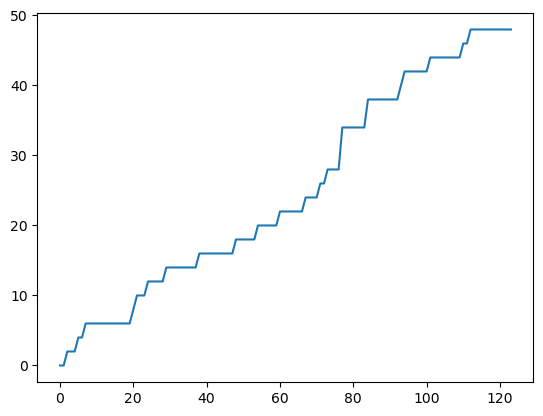

In [16]:
plt.plot(sim1.get_history()["collisions"])

# Multiple run

In [10]:
for i in range(500):
    sim1 = SimulatorMagnetic(Bz=1e-7, **params_model)
    sim1.r_init, sim1.v_init = r_init.copy(), v_init.copy()
    sim1.reorient_velocities()
    sim1.rotational_push(0.8)
#     print(sim1.angular_momentum(sim1.r_init, sim1.v_init)[2].sum())

    sim0 = SimulatorMagnetic(Bz=0, **params_model)
    sim0.r_init, sim0.v_init = sim1.r_init, sim1.v_init
    
    pool.apply_async(sim1.simulate_async, kwds=params_simulation)
    res = pool.apply_async(sim0.simulate_async, kwds=params_simulation)

In [11]:
res.successful()

True

In [9]:
get_logger()

<Logger multiprocessing (INFO)>

# Single run

In [7]:
sim1 = SimulatorMagnetic(Bz=1e-7, **params_model)
sim1.r_init, sim1.v_init = r_init.copy(), v_init.copy()
sim1.reorient_velocities()
sim1.rotational_push(0.8)
print(sim1.angular_momentum(sim1.r_init, sim1.v_init)[2].sum())

sim0 = SimulatorMagnetic(Bz=0, **params_model)
sim0.r_init, sim0.v_init = sim1.r_init, sim1.v_init

74.96671912307707


In [8]:
id1_ref = pool.apply_async(sim1.simulate_async, kwds=params_simulation)
id0_ref = pool.apply_async(sim0.simulate_async, kwds=params_simulation)

sim0.load(id=id0_ref.get())
sim1.load(id=id1_ref.get())

In [44]:
df0 = sim0.get_data_frames()
df1 = sim1.get_data_frames()

<AxesSubplot:>

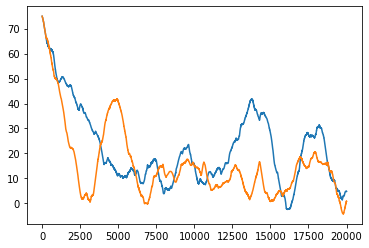

In [45]:
df0["L"].sum(axis=1).plot()
df1["L"].sum(axis=1).plot()


<AxesSubplot:>

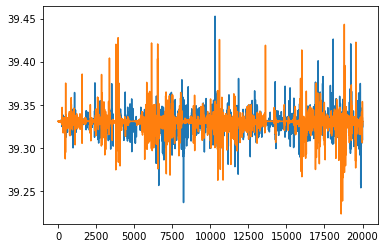

In [48]:
dfs = df0
(dfs["KE"] + dfs["PE"] + 0.5*dfs["IE"]).sum(axis=1).plot()
dfs = df1
(dfs["KE"] + dfs["PE"] + 0.5*dfs["IE"]).sum(axis=1).plot()

In [47]:
beep()

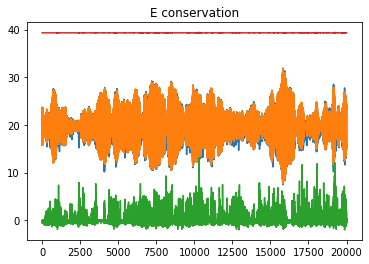

In [50]:
dfs=df0
ax = dfs["KE"].sum(axis=1).plot()
dfs["PE"].sum(axis=1).plot(ax=ax)
dfs["IE"].sum(axis=1).plot(ax=ax)
(dfs["KE"] + dfs["PE"] + 0.5*dfs["IE"]).sum(axis=1).plot()
plt.title("E conservation");

In [29]:
2*np.pi*sim0.abc

array([        nan,         nan, 18.29105959])

In [52]:
sim0.abc

array([2.88675135, 2.89885518, 2.91111255])

/home/amatevosyan/Notebooks/LJ-magnetic/simulator/ideal.py:29: RuntimeWarning: invalid value encountered in sqrt
  self.eccentricity = np.sqrt(1-(self.abc[1]/self.abc[0])**2)
/home/amatevosyan/Notebooks/LJ-magnetic/simulator/ideal.py:29: RuntimeWarning: invalid value encountered in sqrt
  self.eccentricity = np.sqrt(1-(self.abc[1]/self.abc[0])**2)


<AxesSubplot:>

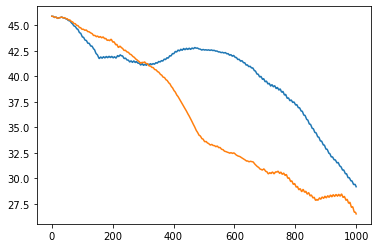

In [6]:
SimulatorMagnetic(id=2444).get_data_frames()["L"].sum(axis=1).plot(label="dt=1e-4")
SimulatorMagnetic(id=2442).get_data_frames()["L"].sum(axis=1).plot(label="dt=1e-3")

/home/amatevosyan/Notebooks/LJ-magnetic/simulator/ideal.py:29: RuntimeWarning: invalid value encountered in sqrt
  self.eccentricity = np.sqrt(1-(self.abc[1]/self.abc[0])**2)
/home/amatevosyan/Notebooks/LJ-magnetic/simulator/ideal.py:29: RuntimeWarning: invalid value encountered in sqrt
  self.eccentricity = np.sqrt(1-(self.abc[1]/self.abc[0])**2)


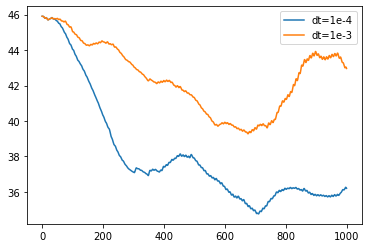

In [8]:
SimulatorMagnetic(id=2443).get_data_frames()["L"].sum(axis=1).plot(label="dt=1e-4")
SimulatorMagnetic(id=2441).get_data_frames()["L"].sum(axis=1).plot(label="dt=1e-3")
plt.legend()

In [16]:
params_model = {
    "group_name" : "Ashot",
    "R" : 1.0,
    "Rz" : 0.1,
    "eccentricity": 0.35,
    "sigma":0.5,
    "epsilon":1.0,
    # "logger" : logger
}
params_init = {
    "energy": 1.0,
    "sigma_grid":0.55,
    "position_random_shift_percentage": 1.0/100,
    "planar": False,
    "zero_momentum": False,
}
params_simulation = {
    "iteration_time" : 100,
#     "dt" : 1e-3,
    "record_interval" : 1e-2,
    "algorithm" : "VERLET",
#     "before_step" : before_step
}

In [17]:
sim1 = SimulatorMagnetic(Bz=0, **params_model)
sim1.init_positions_velocities(**params_init)
# sim1.r_init, sim1.v_init = r_init.copy(), v_init.copy()
sim1.rotational_push(0.3)
print(sim1.angular_momentum(sim1.r_init, sim1.v_init)[2].sum())

sim0 = SimulatorMagnetic(Bz=0, **params_model)
sim0.r_init, sim0.v_init = sim1.r_init, sim1.v_init

9.462384446987889


In [20]:
id1_ref = pool.apply_async(sim1.simulate_async, kwds={"dt":0.0001, **params_simulation})
id0_ref = pool.apply_async(sim0.simulate_async, kwds={"dt":0.001, **params_simulation})

sim0.load(id=id0_ref.get())
sim1.load(id=id1_ref.get())

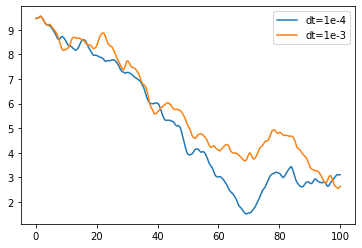

In [19]:
sim0.get_data_frames()["L"].sum(axis=1).plot(label="dt=1e-4")
sim1.get_data_frames()["L"].sum(axis=1).plot(label="dt=1e-3")
plt.legend()